# Численное интегрирование 
Методы:
 - Метод прямоугольника
 - Метод трапеций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Объявление переменных

In [2]:
a = 0
b = 1
dx = 0.0001
expect_int = 1

print("a =", a)
print("b =", b)
print("dx =", dx)

a = 0
b = 1
dx = 0.0001


## Определение интегрируемой функции
$$f(x) = 3\cdot x^2$$

In [3]:
def F(x):
    return 3 * x ** 2

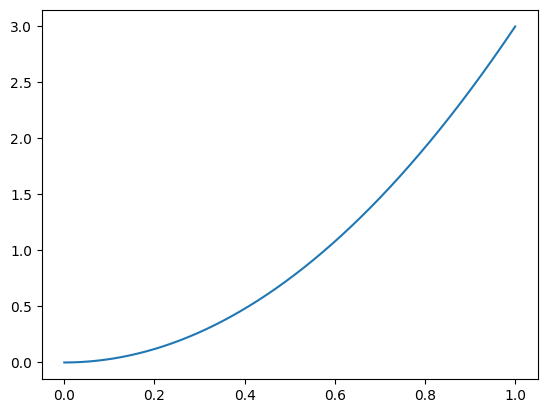

In [4]:
XX = np.arange(a, b + dx, dx)
YY = F(XX)

plt.plot(XX, YY)

## Метод прямоугольников

In [5]:
def IntegralRect(a, b, dx, f):
    S = 0
    n = 0

    while a < b:
        S += f(a)
        a += dx
        n += 1

    return S * dx, n

In [6]:
i_rect, n_rect = IntegralRect(a, b, dx, F)

In [7]:
err_rect = abs(expect_int - i_rect)

print("Результат вычислений:", i_rect)
print("Уровень ошибки:", err_rect * 100, "%")
print("Количество итераций:", n_rect)

Результат вычислений: 1.0001500049998275
Уровень ошибки: 0.015000499982753546 %
Количество итераций: 10001


## Метод трапеции

In [8]:
def IntegralTrap(a, b, dx, f):
    n=abs((a-b-dx)/dx)
    res=0
    while a < b:
        res+=dx*(f(a)+f(a+dx))/2
        a+=dx
    return res, n

In [9]:
i_rect, n_rect = IntegralTrap(a, b-dx, dx, F)

In [10]:
err_rect = abs(expect_int - i_rect)

print("Результат вычислений:", i_rect)
print("Уровень ошибки:", err_rect * 100, "%")
print("Количество итераций:", n_rect)

Результат вычислений: 1.000000004999828
Уровень ошибки: 4.999828107088433e-07 %
Количество итераций: 10000.0


## Уровень ошибки в зависимости от количества итераций

In [11]:
counter = 0.1
DX = [0] * 7
for i in range(7):
    DX[i] = counter / 10
    counter /= 10
    
print(DX)

vec_res_rect = [0] * 7
vec_n_rect = [0] * 7
for i in range(7):
    res, vec_n_rect[i] = IntegralRect(a, b-DX[i], DX[i], F)
    vec_res_rect[i] = abs(expect_int - res) * 100

print(vec_res_rect, vec_n_rect)

[0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07, 1.0000000000000002e-08]
[4.435299999999886, 0.44935029999984, 0.014999500017254253, 0.001499995188536385, 0.000449999198659512, 1.5029248745523915e-05, 4.246115159478592e-06] [99, 999, 10000, 100000, 999999, 10000000, 99999999]


[10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
[14.500000000000002, 1.4949999999998798, 0.14994999999984326, 0.014999500017309764, 0.0014999951880700912, 0.00014999980056940032, 1.502926292307194e-05, 1.2461257359319688e-06]
[0.49999999999998934, 0.005000000000121574, 5.000000007360228e-05, 4.999828107088433e-07, 4.810507547858833e-09, 1.992850329202156e-10, 2.9250024624616344e-08, 2.5387794089226645e-07]


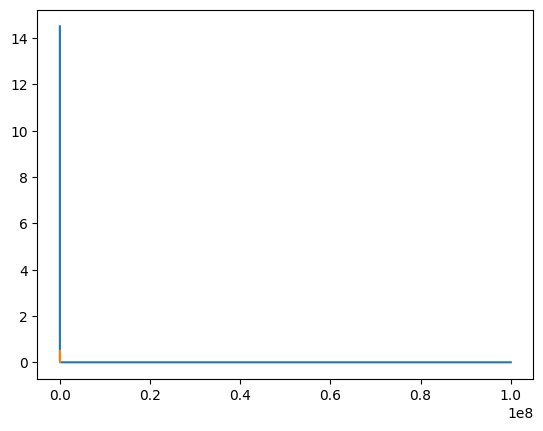

In [12]:
#метод прямоугольников
def rect_integral(f,xmin,xmax,n):
    dx=(xmax-xmin)/n
    area=0
    x=xmin
    for i in range(n):
        area+=dx*f(x)
        x+=dx
    return area

#метод трапеций
def tr_integral(f,xmin,xmax,n):
    dx=(xmax-xmin)/n
    area=0
    x=xmin
    for i in range(n):
        area+=dx*(f(x)+f(x+dx))/2
        x+=dx
    return area

counter = 1
NN = [0] * 8
for i in range(8):
    NN[i] = counter * 10
    counter *= 10
    
vec_res_rect = [0] * 8
vec_res_tr = [0] * 8
for i in range(8):
    res_rect = rect_integral(F, a, b, NN[i])
    vec_res_rect[i] = abs(expect_int - res_rect) * 100
    
    res_tr = tr_integral(F, a, b, NN[i])
    vec_res_tr[i] = abs(expect_int - res_tr) * 100
    
print(NN)
print(vec_res_rect)
print(vec_res_tr)

plt.plot(NN, vec_res_rect, vec_res_tr)
